<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/KMeansAndMiniBatchKMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [26]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans

Using images as metrics in clustering can be an effective way to visually evaluate the quality of clustering results. Here are some common visualizations used to assess clustering performance:

Scatter Plots with Cluster Labels:
Visualize the clustering result by plotting the data points and coloring them based on their cluster labels. This helps to see how well the clusters are separated.

Centroid Visualization:
For algorithms like KMeans, visualize the centroids of the clusters to understand their central points.

Silhouette Plot:
Silhouette plots display a measure of how similar each point is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score can also be shown as an image.

Heatmaps:
Heatmaps can be used to visualize the distance matrix between points and their clusters.

Cluster Size Distribution:
Visualize the number of points in each cluster to identify imbalanced clusters.

Example with Scatter Plot and Silhouette Plot
Here is an example of how you can implement these visualizations using Python:

In [27]:
mnist_data = pd.read_csv("/content/sample_data/train.csv")
mnist_data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
mnist_data.shape

(42000, 785)

In [29]:
sorted(mnist_data['label'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [30]:
mnist_features = mnist_data.drop('label', axis=1)

In [31]:
mnist_features.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
mnist_labels = mnist_data['label']
mnist_labels.head()


0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [33]:
def display_image(index):
     print("Digit: ", mnist_labels[index])
     plt.imshow(mnist_features.loc[index].values.reshape(28,28), cmap='Greys')



Digit:  0


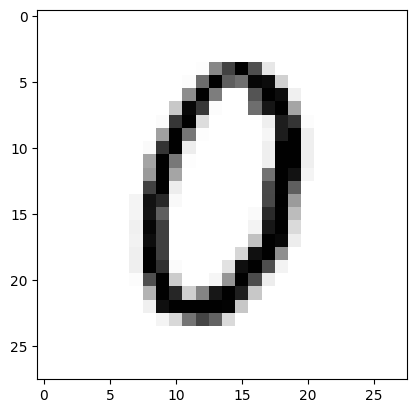

In [34]:
display_image(5)

Digit:  6


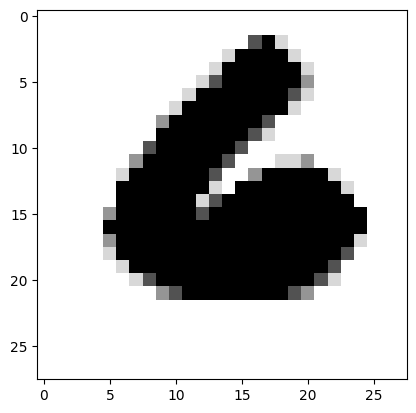

In [35]:
display_image(500)

Digit:  1


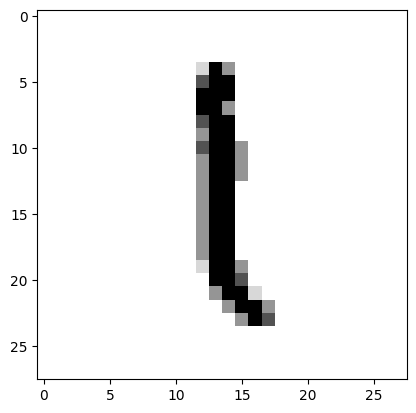

In [36]:
display_image(400)

Digit:  7


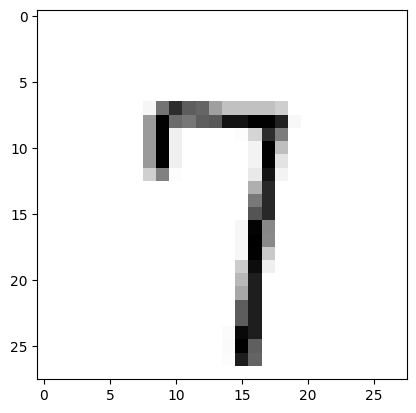

In [37]:
display_image(50)

In [38]:
kmeans_model = KMeans(n_clusters=10, max_iter=1000).fit(mnist_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
kmeans_centroids = kmeans_model.cluster_centers_

kmeans_centroids


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
kmeans_centroids.shape

(10, 784)

<ipython-input-42-2c8b8c9f573b>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, centroid + 1)


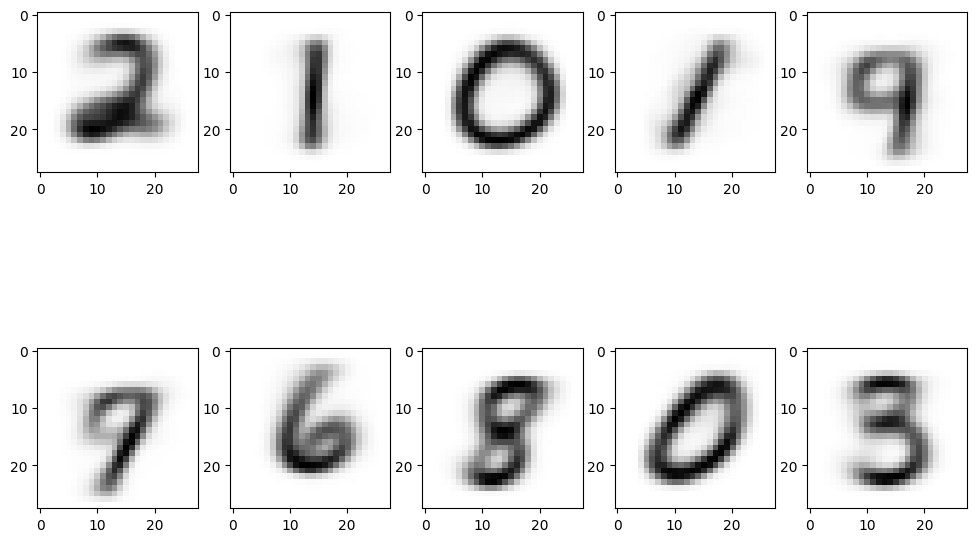

In [42]:
fig, ax = plt.subplots(figsize=(12, 8))

for centroid in range(len(kmeans_centroids)):
    plt.subplot(2, 5, centroid + 1)

    plt.imshow(kmeans_centroids[centroid].reshape(28, 28), cmap='Greys')


In [43]:
np.unique(kmeans_model.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [44]:
mnist_test = mnist_data.sample(10, replace=False)
mnist_test_features = mnist_test.drop('label', axis=1)

mnist_test_labels = mnist_test['label']

In [45]:
mnist_test_labels

13115    3
34930    5
40849    1
31306    1
39033    2
4330     2
27010    7
18966    6
39838    6
12944    4
Name: label, dtype: int64

In [46]:
mnist_test_labels = np.array(mnist_test_labels)

mnist_test_labels

array([3, 5, 1, 1, 2, 2, 7, 6, 6, 4])

In [47]:
pred_clusters = kmeans_model.predict(mnist_test_features)



In [48]:
pred_results = pd.DataFrame({'actual_digit': mnist_test_labels,
'pred_cluster': pred_clusters})

In [49]:
pred_results.head(10)

,actual_digit,pred_cluster
0,3,9
1,5,3
2,1,3
3,1,3
4,2,3
5,2,3
6,7,3
7,6,6
8,6,6
9,4,4


### MiniBatchKMeans is faster for larger datasets

In [50]:
minibatch_kmeans_model = MiniBatchKMeans(n_clusters=10, max_iter=10000, batch_size=100).fit(mnist_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [51]:
minibatch_kmeans_centroids = kmeans_model.cluster_centers_
minibatch_kmeans_centroids.shape

(10, 784)

<ipython-input-52-3176935cf3ec>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 5, centroid + 1)


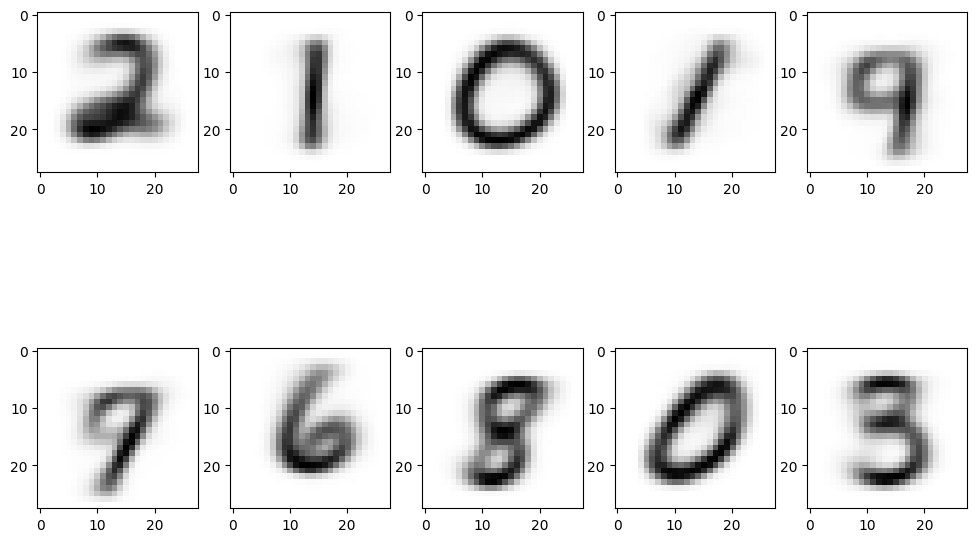

In [52]:
fig, ax = plt.subplots(figsize=(12, 8))
for centroid in range(len(minibatch_kmeans_centroids)):
        plt.subplot(2, 5, centroid + 1)

        plt.imshow(minibatch_kmeans_centroids[centroid].reshape(28, 28), cmap='Greys')